# Genetické algoritmy

Tento zápisník je súčasťou [AI for Beginners Curriculum](http://github.com/microsoft/ai-for-beginners).


In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import time

## Trocha teórie

**Genetické algoritmy** (GA) sú založené na **evolučnom prístupe** k umelej inteligencii, pri ktorom sa využívajú metódy evolúcie populácie na získanie optimálneho riešenia pre daný problém. Boli navrhnuté v roku 1975 [Johnom Henrym Hollandom](https://en.wikipedia.org/wiki/John_Henry_Holland).

Genetické algoritmy sú založené na nasledujúcich myšlienkach:
* Platné riešenia problému môžu byť reprezentované ako **gény**
* Pomocou **kríženia** môžeme spojiť dve riešenia a získať nové platné riešenie
* **Selektovanie** sa používa na výber optimálnejších riešení pomocou nejakej **fitness funkcie**
* **Mutácie** sa zavádzajú na destabilizáciu optimalizácie a na to, aby sme sa dostali z lokálneho minima

Ak chcete implementovať genetický algoritmus, potrebujete nasledovné:

* Nájsť spôsob kódovania riešení problému pomocou **génov** $g\in\Gamma$
* Na množine génov $\Gamma$ definovať **fitness funkciu** $\mathrm{fit}: \Gamma\to\mathbb{R}$. Menšie hodnoty funkcie budú zodpovedať lepším riešeniam.
* Definovať mechanizmus **kríženia**, ktorý spojí dva gény a vytvorí nové platné riešenie $\mathrm{crossover}: \Gamma^2\to\Gamma$.
* Definovať mechanizmus **mutácie** $\mathrm{mutate}: \Gamma\to\Gamma$.
V mnohých prípadoch sú kríženie a mutácia pomerne jednoduché algoritmy na manipuláciu s génmi ako číselnými sekvenciami alebo bitovými vektormi.

Konkrétna implementácia genetického algoritmu sa môže líšiť od prípadu k prípadu, ale celková štruktúra je nasledovná:

1. Vyberte počiatočnú populáciu $G\subset\Gamma$
2. Náhodne vyberte jednu z operácií, ktorá sa vykoná v tomto kroku: kríženie alebo mutácia
3. **Kríženie**:
   * Náhodne vyberte dva gény $g_1, g_2 \in G$
   * Vypočítajte kríženie $g=\mathrm{crossover}(g_1,g_2)$
   * Ak $\mathrm{fit}(g)<\mathrm{fit}(g_1)$ alebo $\mathrm{fit}(g)<\mathrm{fit}(g_2)$ - nahraďte príslušný gén v populácii génom $g$.
4. **Mutácia** - vyberte náhodný gén $g\in G$ a nahraďte ho $\mathrm{mutate}(g)$
5. Opakujte od kroku 2, kým nedosiahnete dostatočne malú hodnotu $\mathrm{fit}$, alebo kým sa nedosiahne limit počtu krokov.

Úlohy, ktoré sa zvyčajne riešia pomocou GA:
1. Optimalizácia rozvrhov
1. Optimálne balenie
1. Optimálne rezanie
1. Urýchlenie vyčerpávajúceho vyhľadávania


## Problém 1: Spravodlivé rozdelenie pokladu

**Úloha**:  
Dvaja ľudia našli poklad, ktorý obsahuje diamanty rôznych veľkostí (a zodpovedajúcich cien). Potrebujú rozdeliť poklad na dve časti tak, aby rozdiel v cene bol 0 (alebo minimálny).

**Formálna definícia**:  
Máme množinu čísel $S$. Potrebujeme ju rozdeliť na dve podmnožiny $S_1$ a $S_2$, tak aby $$\left|\sum_{i\in S_1}i - \sum_{j\in S_2}j\right|\to\min$$ a $S_1\cup S_2=S$, $S_1\cap S_2=\emptyset$.

Najprv definujme množinu $S$:


In [3]:
N = 200
S = np.array([random.randint(1,10000) for _ in range(N)])
print(S)

[8344 2197 9335 3131 5863 9429 3818 9791   15 5455 1396 9538 4872 6549
 8587 5986 6021 9764 8102 5083 5739 7684 8498 3007 6599  820 7490 2372
 9370 5235 3525 3154  859 1906 8159 3950 2173 2988 2050  349 8713 2284
 4177 6033 1651 9176 5049 8201  171 5081 1216 3756 4711 2757 7738 1272
 5650 6584 5395 9004 7797  969 8104 1283 1392 4001 5768  445  274  256
 8239 8015 4381 9021 1189 8879 1411 3539 6526 8011  136 7230 2332  451
 5702 2989 4320 2446 9578 8486 4027 2410 9588 8981 2177 1493 3232 9151
 4835 5594 6859 8394  369 3200  126 4259 2283 7755 2014 2458 8327 8082
 7413 7622 1206 5533 8751 3495 5868 8472 6850 3958 3149 4672 4810 6274
 4700 6134 4627 4616 6656 9949  884 2256 7419 1926 7973 5319 5967 9158
 3823 7697 9466 5675 5412 9784 5426 8209 3421 1136 6047 4429 8001 4417
 1381  722 7350 6018 6235 7860 5853 7660 5937 6242    1 9552 3971 8302
 2633 9227 7283  154 8599 4269 9392 8539 1630  368 2409 9351 3838 9814
 6186 5743 5083 1325 1610  779 3643 3262 5768 8725  961 4611 6310 4788
 1648 

Poďme zakódovať každé možné riešenie problému pomocou binárneho vektora $B\in\{0,1\}^N$, kde číslo na $i$-tej pozícii ukazuje, do ktorého zo súborov ($S_1$ alebo $S_2$) patrí $i$-té číslo v pôvodnom súbore $S$. Funkcia `generate` vygeneruje tieto náhodné binárne vektory.


In [5]:
def generate(S):
    return np.array([random.randint(0,1) for _ in S])

b = generate(S)
print(b)

[1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0]


Poďme teraz definovať funkciu `fit`, ktorá vypočíta „náklady“ riešenia. Bude to rozdiel medzi súčtom dvoch množín, $S_1$ a $S_2$:


In [6]:
def fit(B,S=S):
    c1 = (B*S).sum()
    c2 = ((1-B)*S).sum()
    return abs(c1-c2)

fit(b)

133784

Teraz musíme definovať funkcie pre mutáciu a kríženie:
* Pri mutácii vyberieme jeden náhodný bit a negujeme ho (zmeníme z 0 na 1 a naopak).
* Pri krížení vezmeme niektoré bity z jedného vektora a niektoré bity z druhého. Použijeme rovnakú funkciu `generate` na náhodný výber, ktoré bity zobrať z ktorého vstupného maska.


In [7]:
def mutate(b):
    x = b.copy()
    i = random.randint(0,len(b)-1)
    x[i] = 1-x[i]
    return x

def xover(b1,b2):
    x = generate(b1)
    return b1*x+b2*(1-x)

Poďme vytvoriť počiatočnú populáciu riešení $P$ veľkosti `pop_size`:


In [8]:
pop_size = 30
P = [generate(S) for _ in range(pop_size)]

Teraz hlavná funkcia na vykonanie evolúcie. `n` je počet krokov evolúcie, ktoré sa majú vykonať. V každom kroku:
* S pravdepodobnosťou 30 % vykonáme mutáciu a nahradíme prvok s najhoršou funkciou `fit` mutovaným prvkom
* S pravdepodobnosťou 70 % vykonáme kríženie

Funkcia vráti najlepšie riešenie (gén zodpovedajúci najlepšiemu riešeniu) a históriu minimálnej hodnoty funkcie fit v populácii pri každej iterácii.


In [9]:
def evolve(P,S=S,n=2000):
    res = []
    for _ in range(n):
        f = min([fit(b) for b in P])
        res.append(f)
        if f==0:
            break
        if random.randint(1,10)<3:
            i = random.randint(0,len(P)-1)
            b = mutate(P[i])
            i = np.argmax([fit(z) for z in P])
            P[i] = b
        else:
            i = random.randint(0,len(P)-1)
            j = random.randint(0,len(P)-1)
            b = xover(P[i],P[j])
            if fit(b)<fit(P[i]):
                P[i]=b
            elif fit(b)<fit(P[j]):
                P[j]=b
            else:
                pass
    i = np.argmin([fit(b) for b in P])
    return (P[i],res)

(s,hist) = evolve(P)
print(s,fit(s))

[0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1] 4


Môžete vidieť, že sa nám podarilo výrazne minimalizovať funkciu `fit`! Tu je graf, ktorý ukazuje, ako sa funkcia `fit` pre celú populáciu správa počas procesu.


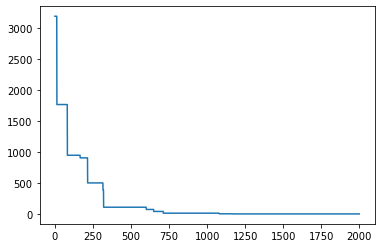

In [10]:
plt.plot(hist)
plt.show()

## Problém 2: Problém N kráľovien

**Úloha**:  
Musíte umiestniť $N$ kráľovien na šachovnicu veľkosti $N\times N$ tak, aby sa navzájom neohrozovali.

Najprv vyriešme tento problém bez použitia genetických algoritmov, pomocou úplného prehľadávania. Stav šachovnice môžeme reprezentovať zoznamom $L$, kde $i$-te číslo v zozname predstavuje horizontálnu pozíciu kráľovnej v $i$-tom riadku. Je celkom zrejmé, že každé riešenie bude mať iba jednu kráľovnú na riadok a každý riadok bude obsahovať jednu kráľovnú.

Naším cieľom bude nájsť prvé riešenie problému, po ktorom zastavíme hľadanie. Túto funkciu môžete ľahko rozšíriť tak, aby generovala všetky možné pozície pre kráľovné.


In [11]:
N = 8

def checkbeats(i_new,j_new,l):
    for i,j in enumerate(l,start=1):
        if j==j_new:
            return False
        else:
            if abs(j-j_new) == i_new-i:
                return False
    return True

def nqueens(l,N=8,disp=True):
    if len(l)==N:
        if disp: print(l)
        return True
    else:
        for j in range(1,N+1):
            if checkbeats(len(l)+1,j,l):
                l.append(j)
                if nqueens(l,N,disp): return True
                else: l.pop()
        return False
            
nqueens([],8)


[1, 5, 8, 6, 3, 7, 2, 4]


True

Teraz zmerajme, ako dlho trvá nájsť riešenie problému 20 kráľovien:


In [12]:
%timeit nqueens([],20,False)

10.6 s ± 2.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Teraz vyriešime ten istý problém pomocou genetického algoritmu. Toto riešenie je inšpirované [týmto blogovým príspevkom](https://kushalvyas.github.io/gen_8Q.html).

Každé riešenie budeme reprezentovať rovnakým zoznamom dĺžky $N$, a ako funkciu `fit` použijeme počet kráľovien, ktoré sa navzájom ohrozujú:


In [13]:
def fit(L):
    x=0
    for i1,j1 in enumerate(L,1):
        for i2,j2 in enumerate(L,1):
            if i2>i1:
                if j2==j1 or (abs(j2-j1)==i2-i1): x+=1
    return x

Keďže výpočet fitness funkcie je časovo náročný, uložme každé riešenie v populácii spolu s hodnotou fitness funkcie. Vygenerujme počiatočnú populáciu:


In [14]:
def generate_one(N):
    x = np.arange(1,N+1)
    np.random.shuffle(x)
    return (x,fit(x))

def generate(N,NP):
    return [generate_one(N) for _ in range(NP)]

generate(8,5)

[(array([2, 3, 8, 7, 5, 4, 1, 6]), 4),
 (array([3, 4, 5, 1, 2, 8, 6, 7]), 8),
 (array([1, 3, 7, 4, 5, 8, 6, 2]), 6),
 (array([1, 5, 4, 6, 8, 3, 7, 2]), 4),
 (array([3, 5, 7, 1, 8, 6, 4, 2]), 3)]

Teraz musíme definovať funkcie mutácie a kríženia. Kríženie by spojilo dva gény dohromady tak, že by ich rozdelilo na náhodnom mieste a zoskupilo dve časti z rôznych génov dokopy.


In [15]:
def mutate(G):
    x=random.randint(0,len(G)-1)
    G[x]=random.randint(1,len(G))
    return G
    
def xover(G1,G2):
    x=random.randint(0,len(G1))
    return np.concatenate((G1[:x],G2[x:]))

xover([1,2,3,4],[5,6,7,8])

array([1, 2, 7, 8])

In [17]:
def choose_rand(P):
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p = np.random.choice(len(P),2,False,p=w)
    return p[0],p[1]

def choose(P):
    def ch(w):
        p=[]
        while p==[]:
            r = random.random()
            p = [i for i,x in enumerate(P) if x[1]>=r]
        return random.choice(p)
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p1=p2=0
    while p1==p2:
        p1 = ch(w)
        p2 = ch(w)
    return p1,p2

Teraz definujme hlavný evolučný cyklus. Logiku urobíme trochu odlišnú od predchádzajúceho príkladu, aby sme ukázali, že je možné byť kreatívny. Budeme opakovať cyklus, kým nedosiahneme dokonalé riešenie (hodnota fitness funkcie = 0), a v každom kroku vezmeme aktuálnu generáciu a vytvoríme novú generáciu rovnakej veľkosti. Toto sa vykonáva pomocou funkcie `nxgeneration` podľa nasledujúcich krokov:

1. Odstráňte najmenej vhodné riešenia - na to slúži funkcia `discard_unfit`
1. Pridajte do generácie niekoľko náhodných riešení
1. Vytvorte novú generáciu veľkosti `gen_size` pomocou nasledujúcich krokov pre každý nový gén:
    - vyberte dva náhodné gény, s pravdepodobnosťou úmernou hodnote fitness funkcie
    - vypočítajte kríženie
    - aplikujte mutáciu s pravdepodobnosťou `mutation_prob`


In [20]:
mutation_prob = 0.1

def discard_unfit(P):
    P.sort(key=lambda x:x[1])
    return P[:len(P)//3]

def nxgeneration(P):
    gen_size=len(P)
    P = discard_unfit(P)
    P.extend(generate(len(P[0][0]),3))
    new_gen = []
    for _ in range(gen_size):
        p1,p2 = choose_rand(P)
        n = xover(P[p1][0],P[p2][0])
        if random.random()<mutation_prob:
            n=mutate(n)
        nf = fit(n)
        new_gen.append((n,nf))
        '''
        if (nf<=P[p1][1]) or (nf<=P[p2][1]):
            new_gen.append((n,nf))
        elif (P[p1][1]<P[p2][1]):
            new_gen.append(P[p1])
        else:
            new_gen.append(P[p2])
        '''
    return new_gen
    
def genetic(N,pop_size=100):
    P = generate(N,pop_size)
    mf = min([x[1] for x in P])
    n=0
    while mf>0:
        #print("Generation {0}, fit={1}".format(n,mf))
        n+=1
        mf = min([x[1] for x in P])
        P = nxgeneration(P)
    mi = np.argmin([x[1] for x in P])
    return P[mi]

genetic(8)

(array([4, 7, 5, 3, 1, 6, 8, 2]), 0)

In [19]:
%timeit genetic(10)

The slowest run took 18.71 times longer than the fastest. This could mean that an intermediate result is being cached.
26.4 s ± 28.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)



---

**Upozornenie**:  
Tento dokument bol preložený pomocou služby AI prekladu [Co-op Translator](https://github.com/Azure/co-op-translator). Hoci sa snažíme o presnosť, prosím, berte na vedomie, že automatizované preklady môžu obsahovať chyby alebo nepresnosti. Pôvodný dokument v jeho pôvodnom jazyku by mal byť považovaný za autoritatívny zdroj. Pre kritické informácie sa odporúča profesionálny ľudský preklad. Nie sme zodpovední za akékoľvek nedorozumenia alebo nesprávne interpretácie vyplývajúce z použitia tohto prekladu.
